## CH5 Support Vector Machines Exercises


1. What is the fundamental idea behind support vector machines?

the fundamental idea is not only separate the data with a line (in linear case) but also make that line as far as possible from closest instances from different classes. and using idea of `soft margin` make it's easier to reach generalization.

<br>
<br>

2. What is a support vector?

support vector are instances that the model use to fit it's line between them, closest instances from different classes to each other. points that located at the edges of the (street) or even on the street.

<br>
<br>

3. Why is it important to scale the inputs when using SVMs?

because svms are sensitive to feature scales, if features are not scaled SVM will tend to neglect the feature with small scale.

<br>
<br>

4. Can an SVM classifier output a confidence score when it classifies an instance? What about a probability?

We can use decision function that gives the distance between instances and decision boundary.
if we specify it's `probability` hyperparameter to be true, it will fit logistic regression model after it, which enables predict_proba method.

<br>
<br>

5. How can you choose between LinearSVC, SVC, and SGDClassifier?

`SGD` differ from them that it can use out-of-core support which don't need all data to be in memory but process one instance at time, fast and computational efficient with comparison of SVC, `Linear SVC` is quite faster than SVC.
`SVC` uses kernel tricks which can do high polynomial degrees without actually being in the memory and this gives SVC the ability to fit complex patterns in data. and can scale will with high number of features, but not very high number of instances.

<br>
<br>

6. Say you’ve trained an SVM classifier with an RBF kernel, but it seems to underfit the training set. Should you increase or decrease γ (gamma)? What about C?

$\gamma$ and C are similar hyperparameter, especially in regularization, if the model underfit the training set we should increase $C$ or $\gamma$ or both.

<br>
<br>

7. What does it mean for a model to be ϵ-insensitive?

reducing $\epsilon$ would increase instances in margins, which will regularize the model.
if we add more instances that `in` margins, it will not effect the model prediction.

<br>
<br>

8. What is the point of using the kernel trick?

mathematical technique that make it possible to train nonlinear SVM, the resulting model equivalent to mapping inputs into another space using non-linear transformation, then training LinearSVM on the resulting high-dimensional inputs. Without actually creating them and exploding the memory with them.


---


##### 9. Train a LinearSVC on a linearly separable dataset. Then train an SVC and a SGDClassifier on the same dataset. See if you can get them to produce roughly the same model.


In [1]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [2]:
def build_model(model, X_train=None, X_test=None, y_train=None, y_test=None):
    model.fit(X_train, y_train)
    print(type(model).__name__,)
    print('Train ACC: ', accuracy_score(model.predict(X_train), y_train))
    print('Test ACC: ', accuracy_score(model.predict(X_test), y_test), '\n')

In [3]:
build_model(LinearSVC(dual=True), *train_test_split(X, y,
            test_size=.8, random_state=3, stratify=y))
build_model(SGDClassifier(), *train_test_split(X, y,
            test_size=.8, random_state=3, stratify=y))
build_model(SVC(), *train_test_split(X, y,
            test_size=.8, random_state=3, stratify=y))

LinearSVC
Train ACC:  1.0
Test ACC:  1.0 

SGDClassifier
Train ACC:  1.0
Test ACC:  1.0 

SVC
Train ACC:  1.0
Test ACC:  1.0 



In [4]:
C = 5
alpha = 0.05

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lin_clf = LinearSVC(dual=True,
                    random_state=42).fit(X_scaled, y)
svc_clf = SVC(kernel="linear").fit(X_scaled, y)
sgd_clf = SGDClassifier(random_state=42).fit(X_scaled, y)

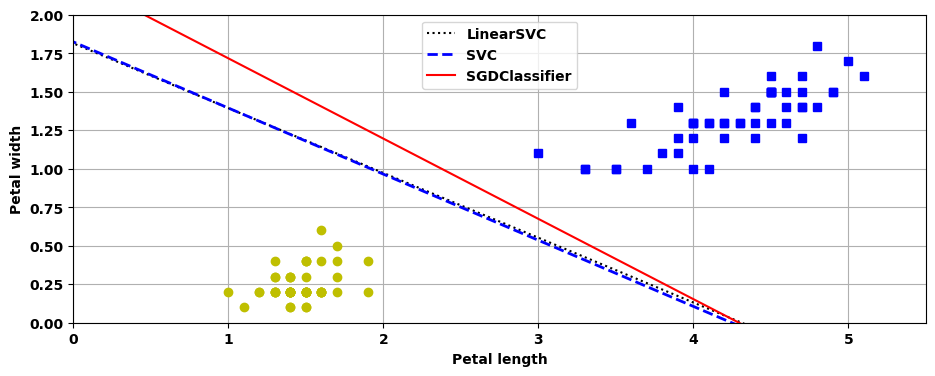

In [5]:
def compute_decision_boundary(model):
    w = -model.coef_[0, 0] / model.coef_[0, 1]
    b = -model.intercept_[0] / model.coef_[0, 1]
    return scaler.inverse_transform([[-10, -10 * w + b], [10, 10 * w + b]])


lin_line = compute_decision_boundary(lin_clf)
svc_line = compute_decision_boundary(svc_clf)
sgd_line = compute_decision_boundary(sgd_clf)

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(lin_line[:, 0], lin_line[:, 1], "k:", label="LinearSVC")
plt.plot(svc_line[:, 0], svc_line[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(sgd_line[:, 0], sgd_line[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")  # label="Iris versicolor"
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")  # label="Iris setosa"
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper center")
plt.axis([0, 5.5, 0, 2])
plt.grid()

plt.show()

##### 10. Train an SVM classifier on the wine dataset, which you can load using sklearn.datasets.load_wine(). This dataset contains the chemical analyses of 178 wine samples produced by 3 different cultivators: the goal is to train a classification model capable of predicting the cultivator based on the wine’s chemical analysis. Since SVM classifiers are binary classifiers, you will need to use one-versus-all to classify all three classes. What accuracy can you reach?


In [95]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [96]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

In [103]:
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=3, stratify=y)
X_train.shape

(142, 13)

In [104]:
X_test.shape

(36, 13)

<Figure size 1000x1000 with 0 Axes>

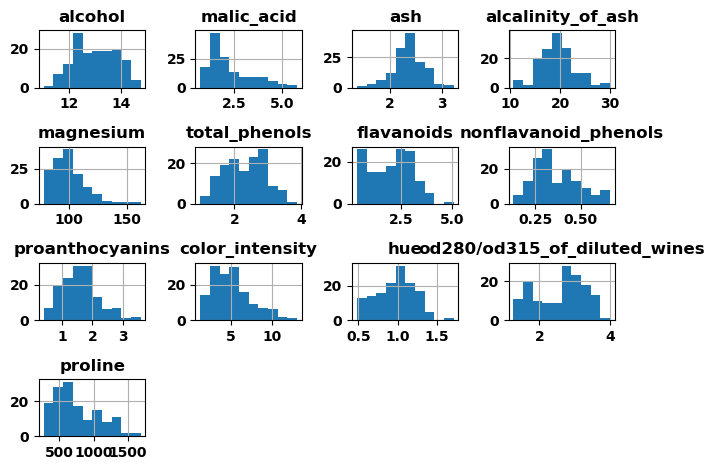

In [105]:
plt.figure(figsize=(10, 10))
X_train.hist()
plt.tight_layout()
plt.show()

let's try it without scaling


In [112]:
model = LinearSVC(dual=True, random_state=42).fit(X_train, y_train)

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


ok i will increase the number of iterations.


In [113]:
model = LinearSVC(dual=True, max_iter=1_000_000,
                  random_state=42).fit(X_train, y_train)

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


failed to converge!! even with million of iterations..


In [114]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train).mean()

c:\Users\sayed\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sayed\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sayed\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sayed\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sayed\anaconda3\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9502463054187194

now let's try scaling


In [115]:
from sklearn import set_config
set_config(transform_output='pandas')

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [116]:
from sklearn.svm import SVC

model = SVC(kernel='poly', degree=3, random_state=3, C=.01, gamma=.7)
model.fit(X_train, y_train)

SVC(C=0.01, gamma=0.7, kernel='poly', random_state=3)

In [117]:
y_pred = model.predict(X_train)
print('Train Acc', accuracy_score(y_train, y_pred))

yts_pred = model.predict(X_test)
print('Test Acc', accuracy_score(y_test, yts_pred))

Train Acc 1.0
Test Acc 1.0


In [118]:
from sklearn.svm import LinearSVC

model = LinearSVC(dual=True, random_state=3)
model.fit(X_train, y_train)

y_pred = model.predict(X_train)
print('Train Acc', accuracy_score(y_train, y_pred))

yts_pred = model.predict(X_test)
print('Test Acc', accuracy_score(y_test, yts_pred))

Train Acc 1.0
Test Acc 0.9722222222222222


In [119]:
cross_val_score(model, X_train, y_train).mean()

0.9714285714285715

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

param_dist = {
    'gamma': loguniform(.001, 0.1),
    'C': uniform(1, 10)
}
rd_search = RandomizedSearchCV(
    SVC(random_state=42), param_distributions=param_dist, n_iter=100, cv=5)

rd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AD5CC21390>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AD5CC220E0>})

In randomized search, n_itr typically refers to the number of iterations or iterations of random search. Randomized search, also known as Random Search or Randomized Parameter Optimization, is a technique used in machine learning for hyperparameter optimization.

Instead of exhaustively searching through all possible combinations of hyperparameters, randomized search selects random combinations of hyperparameters from specified distributions. n_itr specifies the number of random combinations that will be tried during the search process.


In [130]:
rd_search.best_estimator_

SVC(C=1.8565287691766676, gamma=0.004861518667159404, random_state=42)

In [131]:
rd_search.best_score_

0.9928571428571429

In [132]:
rd_search.score(X_test, y_test)

1.0

---


##### 11. Train and fine-tune an SVM regressor on the California housing dataset. You can use the original dataset rather than the tweaked version we used in Chapter 2, which you can load using sklearn.datasets.fetch_california_housing(). The targets represent hundreds of thousands of dollars. Since there are over 20,000 instances, SVMs can be slow, so for hyperparameter tuning you should use far fewer instances (e.g., 2,000) to test many more hyperparameter combina‐ tions. What is your best model’s RMSE?


In [133]:
from sklearn.datasets import fetch_california_housing

calf = fetch_california_housing()

In [135]:
calf.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [138]:
print(calf.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [145]:
import pandas as pd

In [150]:
data = pd.DataFrame(calf.data, columns=calf.feature_names)
data[calf.target_names[0]] = calf.target
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [151]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [155]:
X, y = data.drop(columns=['MedHouseVal']), data['MedHouseVal']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.3, random_state=3)

In [158]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_trainW = X_train[:2000]
X_testW = X_test[:2000]
y_trainW = y_train[:2000]
y_testW = y_test[:2000]

In [162]:
from sklearn.svm import SVR
from scipy.stats import randint
param_dist = {
    'gamma': loguniform(.001, .1),
    'C': uniform(1, 100),
    'epsilon': uniform(.1, 1.5),
    'degree': randint(2, 7),
    'kernel': ['linear', 'poly', 'rbf']
}

rd_search = RandomizedSearchCV(SVR(), param_dist, n_iter=500,
                               random_state=3, n_jobs=-1, scoring='neg_root_mean_squared_error', verbose=2)

In [163]:
rd_search.fit(X_trainW, y_trainW)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


RandomizedSearchCV(estimator=SVR(), n_iter=500, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AD66271330>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AD66272920>,
                                        'epsilon': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AD66272710>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001AD5ED68550>,
                                        'kernel': ['linear', 'poly', 'rbf']},
                   random_state=3, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [169]:
rd_search.best_params_

{'C': 51.192334283930194,
 'degree': 2,
 'epsilon': 0.20555463986128739,
 'gamma': 0.04762191157306398,
 'kernel': 'rbf'}

In [164]:
rd_search.best_estimator_

SVR(C=51.192334283930194, degree=2, epsilon=0.20555463986128739,
    gamma=0.04762191157306398)

In [167]:
-rd_search.best_score_

0.5875335472986647

In [168]:
from sklearn.metrics import mean_squared_error

y_pred = rd_search.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.6223986595419